In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [2]:
with open('../../output/weights/p_date=2022-08-14-12_22_24/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

122001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [3]:
# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-50_000:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-50_000:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ]#[-500:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"]) if str(v) != "nan" }

In [4]:
def plot(data, title, labelX, labelY):
    interval = 1000
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : stat.mean(list(data.values())[i:i+interval+1]) for i in range(0, len(data.values()), interval) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average (simple): {moving_average}")
    print(f"Moving Average: {percent_list}")
   
    print(f"Minimum: {min(data.values())}")

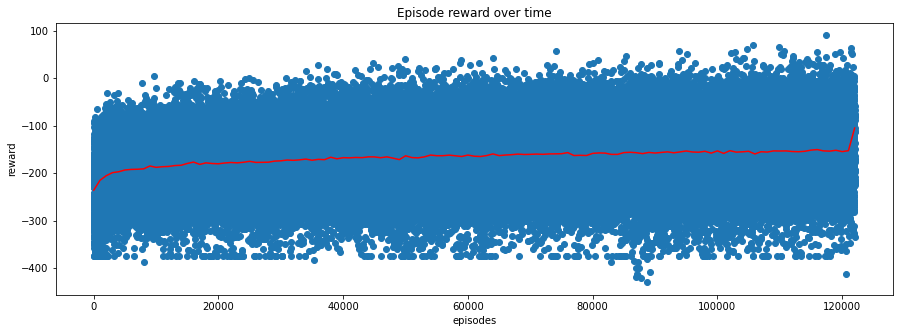

Maximum: 89.80000000000001
Average: -167.19142793910663
Moving Average (simple): {0: -236.004995004995, 1000: -215.0999000999001, 2000: -205.42737262737262, 3000: -199.03436563436563, 4000: -197.1142857142857, 5000: -193.41778221778222, 6000: -192.22397602397604, 7000: -191.86033966033966, 8000: -191.07372627372627, 9000: -184.99220779220778, 10000: -187.87372627372628, 11000: -186.55744255744256, 12000: -185.96083916083916, 13000: -184.1202797202797, 14000: -183.4837162837163, 15000: -179.7060939060939, 16000: -176.78001998001997, 17000: -181.63176823176823, 18000: -178.41358641358642, 19000: -179.81038961038962, 20000: -180.399000999001, 21000: -178.6843156843157, 22000: -177.64595404595406, 23000: -178.392007992008, 24000: -177.1818181818182, 25000: -175.2073926073926, 26000: -177.5042957042957, 27000: -177.29310689310688, 28000: -177.0077922077922, 29000: -174.75124875124874, 30000: -174.14805194805194, 31000: -172.48531468531468, 32000: -173.07132867132867, 33000: -172.12567432567

In [5]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

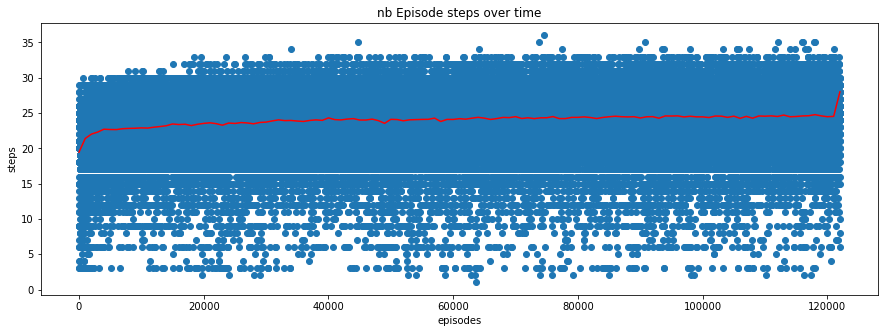

Maximum: 36
Average: 23.956934779223122
Moving Average (simple): {0: 19.456543456543457, 1000: 21.395604395604394, 2000: 22.014985014985015, 3000: 22.301698301698302, 4000: 22.70729270729271, 5000: 22.662337662337663, 6000: 22.651348651348652, 7000: 22.77722277722278, 8000: 22.82217782217782, 9000: 22.842157842157842, 10000: 22.893106893106893, 11000: 22.864135864135864, 12000: 22.99000999000999, 13000: 23.084915084915085, 14000: 23.196803196803195, 15000: 23.447552447552447, 16000: 23.364635364635365, 17000: 23.412587412587413, 18000: 23.218781218781217, 19000: 23.406593406593405, 20000: 23.52747252747253, 21000: 23.615384615384617, 22000: 23.48951048951049, 23000: 23.275724275724276, 24000: 23.581418581418582, 25000: 23.51948051948052, 26000: 23.647352647352648, 27000: 23.59040959040959, 28000: 23.473526473526473, 29000: 23.66133866133866, 30000: 23.71228771228771, 31000: 23.884115884115886, 32000: 24.02897102897103, 33000: 23.923076923076923, 34000: 23.945054945054945, 35000: 23.861

In [6]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

In [7]:
#plot(loss_filtered, "Loss over time", "episodes", "loss")

In [8]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [9]:
#plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [10]:
#plot(duration, "Duration over time", "episodes", "duration")

In [11]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")